In [1]:
import os
import pandas as pd
import datetime
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import LogisticRegression
import numpy as np
import scipy 
import math
import h5py
import time
import copy
import sys
import feather
from sklearn.metrics import mean_absolute_error
from numpy.random import seed
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
seed(123)
from tensorflow import set_random_seed
set_random_seed(456)
np.set_printoptions(threshold=sys.maxsize)

In [2]:
# set up training set
view_1hot_df = feather.read_dataframe("/home/whsu014/data/view_1hot_nona_len29_float_age_impute_and_True_HG_100096inds.feather")
print(view_1hot_df.columns)
print(view_1hot_df.shape)

print(view_1hot_df['CVD_ISOSORBRIDE_DINITRATE'].unique())
view_1hot_df = view_1hot_df.drop(['CVD_ISOSORBRIDE_DINITRATE'], axis=1)
print(view_1hot_df.shape)
print("Number of inds:", len(view_1hot_df['VSIMPLE_INDEX_MASTER'].unique()))
# set length to 28
print(view_1hot_df.shape[0]/29)
view_1hot_df = copy.deepcopy(view_1hot_df[view_1hot_df['QUARTER']!=0])
print(view_1hot_df.shape[0]/28)
# Take 90000 inds for train and validation set
# remove true values
# remove QUARTER
view_1hot_df = view_1hot_df.drop(['QUARTER'], axis=1)
train_v = copy.deepcopy(view_1hot_df.iloc[:(28*90000), :-7].values)
print(train_v.shape)
print(train_v.shape[0]/28)

# set up test set
test_df = feather.read_dataframe("/home/whsu014/data/Test_set_with_TRUE_10096inds.feather")
print(test_df.columns)
print(test_df.shape)
print("Number of inds:", len(test_df['VSIMPLE_INDEX_MASTER'].unique()))
test_v = copy.deepcopy(test_df.iloc[:, :-7].values)

Index(['VSIMPLE_INDEX_MASTER', 'QUARTER', 'AGE', 'SEX', 'NZDEP', 'ETHN_1',
       'ETHN_2', 'ETHN_3', 'ETHN_4', 'ETHN_5',
       ...
       'PT_DIABETES_YR', 'PT_ATRIAL_FIBRILLATION', 'PT_IMP_FATAL_CVD',
       'TRUE_HDL', 'TRUE_LDL', 'TRUE_TRI', 'TRUE_TCL', 'TRUE_TCHDL',
       'TRUE_HBA1C', 'TRUE_EGFR'],
      dtype='object', length=191)
(2902784, 191)
[0.]
(2902784, 190)
Number of inds: 100096
100096.0
100096.0
(2520000, 182)
90000.0
Index(['VSIMPLE_INDEX_MASTER', 'AGE', 'SEX', 'NZDEP', 'ETHN_1', 'ETHN_2',
       'ETHN_3', 'ETHN_4', 'ETHN_5', 'TEST',
       ...
       'PT_DIABETES_YR', 'PT_ATRIAL_FIBRILLATION', 'PT_IMP_FATAL_CVD',
       'TRUE_HDL', 'TRUE_LDL', 'TRUE_TRI', 'TRUE_TCL', 'TRUE_TCHDL',
       'TRUE_HBA1C', 'TRUE_EGFR'],
      dtype='object', length=189)
(282688, 189)
Number of inds: 10096


In [3]:
print(train_v.shape)
print(test_v.shape)

(2520000, 182)
(282688, 182)


In [4]:
print('AGE:', view_1hot_df.columns.get_loc('AGE'))
print('NZDEP:', view_1hot_df.columns.get_loc('NZDEP'))
print('ETHN_1:', view_1hot_df.columns.get_loc('ETHN_1'))
print('ETHN_5:', view_1hot_df.columns.get_loc('ETHN_5'))
print('TEST:', view_1hot_df.columns.get_loc('TEST'))
print('HDL:', view_1hot_df.columns.get_loc('HDL'))
print('LDL:', view_1hot_df.columns.get_loc('LDL'))
print('TRI:', view_1hot_df.columns.get_loc('TRI'))
print('TCL:', view_1hot_df.columns.get_loc('TCL'))
print('TCHDL:', view_1hot_df.columns.get_loc('TCHDL'))
print('TESTED:', view_1hot_df.columns.get_loc('TESTED'))
print('DIED:', view_1hot_df.columns.get_loc('DIED'))
print('############# PHARMS ##############')
print('LL_SIMVASTATIN:', view_1hot_df.columns.get_loc('LL_SIMVASTATIN'))
print('LL_PDC:', view_1hot_df.columns.get_loc('LL_PDC'))
print('CVD_FELODIPINE:', view_1hot_df.columns.get_loc('CVD_FELODIPINE'))
print('CVD_HYDROCHLOROTHIAZIDE:', view_1hot_df.columns.get_loc('CVD_HYDROCHLOROTHIAZIDE'))
print('OTHER_TENOXICAM:', view_1hot_df.columns.get_loc('OTHER_TENOXICAM'))
print('OTHER_VILDAGLIPTIN:', view_1hot_df.columns.get_loc('OTHER_VILDAGLIPTIN'))
print('############# NMDS ##############')
print('NUMBER_OF_DAYS:', view_1hot_df.columns.get_loc('NUMBER_OF_DAYS'))
print('hx_broad_cvd:', view_1hot_df.columns.get_loc('hx_broad_cvd'))
print('out_atrial_fibrillation:', view_1hot_df.columns.get_loc('out_atrial_fibrillation'))
print('############# HbA1c, GFR and PT ##############')
print('HBA1C:', view_1hot_df.columns.get_loc('HBA1C'))
print('TEST_HBA1C:', view_1hot_df.columns.get_loc('TEST_HBA1C'))
print('TESTED_HBA1c:', view_1hot_df.columns.get_loc('TESTED_HBA1C'))
print('EGFR:', view_1hot_df.columns.get_loc('EGFR'))
print('TEST_EGFR:',view_1hot_df.columns.get_loc('TEST_EGFR'))
print('TESTED_EGFR:', view_1hot_df.columns.get_loc('TESTED_EGFR'))
print('PT_SBP:', view_1hot_df.columns.get_loc('PT_SBP'))
print('PT_DIABETES_YR:', view_1hot_df.columns.get_loc('PT_DIABETES_YR'))
print('PT_ATRIAL_FIBRILLATION:', view_1hot_df.columns.get_loc('PT_ATRIAL_FIBRILLATION'))
print('PT_IMP_FATAL_CVD:', view_1hot_df.columns.get_loc('PT_IMP_FATAL_CVD'))

AGE: 1
NZDEP: 3
ETHN_1: 4
ETHN_5: 8
TEST: 9
HDL: 10
LDL: 11
TRI: 12
TCL: 13
TCHDL: 14
TESTED: 15
DIED: 16
############# PHARMS ##############
LL_SIMVASTATIN: 17
LL_PDC: 28
CVD_FELODIPINE: 29
CVD_HYDROCHLOROTHIAZIDE: 81
OTHER_TENOXICAM: 82
OTHER_VILDAGLIPTIN: 119
############# NMDS ##############
NUMBER_OF_DAYS: 120
hx_broad_cvd: 122
out_atrial_fibrillation: 162
############# HbA1c, GFR and PT ##############
HBA1C: 163
TEST_HBA1C: 164
TESTED_HBA1c: 165
EGFR: 166
TEST_EGFR: 167
TESTED_EGFR: 168
PT_SBP: 169
PT_DIABETES_YR: 179
PT_ATRIAL_FIBRILLATION: 180
PT_IMP_FATAL_CVD: 181


In [5]:
def setup_xy_last_quarter(time_series_v):
    num_of_inds = time_series_v.shape[0]//28
    num_of_features = time_series_v.shape[1]
    
    x_ = np.empty((num_of_inds, num_of_features))
    y_ = []
    for i in range(num_of_inds):
        ind_v = copy.deepcopy(time_series_v[(i*28):((i+1)*28), :])
        x_[i, :] = ind_v[7, :]
        if sum(ind_v[8:, 28])/20 >= 80:
            y_.append(1)
        else:
            y_.append(0)
    return x_, np.array(y_)

In [6]:
def setup_xy_aggregated(time_series_v):
    num_of_inds = time_series_v.shape[0]//28
    num_of_features = time_series_v.shape[1]
    
    x_ = np.empty((num_of_inds, num_of_features))
    y_ = []
    for i in range(num_of_inds):
        ind_v = copy.deepcopy(time_series_v[(i*28):((i+1)*28), :])
        x_[i, 0:9] = ind_v[7, 0:9]
        x_[i, 9:169] = np.sum(ind_v[:8, 9:169], axis=0)/8.0
        x_[i, 169:182] = ind_v[7, 169:182]
        if sum(ind_v[8:, 28])/20 >= 80:
            y_.append(1)
        else:
            y_.append(0)
    return x_, np.array(y_)

In [7]:
def setup_xy(time_series_v):
    x_ = []
    y_ = []
    num_of_inds = time_series_v.shape[0]//28
    num_of_features = time_series_v.shape[1]
    print("Number of inds:", num_of_inds)
    print("Number of features:", num_of_features)
    for i in range(num_of_inds):
        ind_v = time_series_v[(i*28):((i+1)*28), :]
        ind_x = ind_v[:8, :] 
        ind_flat_x = []
        for j in range(len(ind_x)):
            if j == 0:
                ind_flat_x.extend(ind_x[j, 0:])
            else:
                ind_flat_x.extend(ind_x[j, 1:])
        x_.append(np.array(ind_flat_x))
        if sum(ind_v[8:, 28])/20 >= 80:
            y_.append(1)
        else:
            y_.append(0)
    return np.array(x_), np.array(y_)

In [8]:
#x_train, y_train = setup_xy(train_v)
#x_test, y_test = setup_xy(test_v)

x_train, y_train = setup_xy_aggregated(train_v)
x_test, y_test = setup_xy_aggregated(test_v)

#x_train, y_train = setup_xy_last_quarter(train_v)
#x_test, y_test = setup_xy_last_quarter(test_v)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(90000, 182)
(90000,)
(10096, 182)
(10096,)


In [36]:
# for logistic regression experiment
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(x_train)
scaled_test = scaler.transform(x_test)
x_train = scaled_train
x_test = scaled_test

print(np.round(x_train[:5, :30], 
              decimals=2))

[[0.78 0.48 0.   0.   0.   0.   0.   1.   0.   0.   0.26 0.11 0.04 0.09
  0.08 1.   0.   0.06 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.06 0.  ]
 [0.83 0.37 0.   0.25 1.   0.   0.   0.   0.   0.   0.22 0.38 0.05 0.22
  0.22 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [0.07 0.39 1.   0.25 0.   0.   0.   0.   1.   1.   0.16 0.24 0.05 0.14
  0.21 1.   0.   0.67 0.   0.41 0.   0.   0.   0.   0.   0.   0.   0.
  1.   0.  ]
 [0.84 0.21 1.   0.25 1.   0.   0.   0.   0.   0.   0.27 0.21 0.02 0.11
  0.1  1.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  1.   0.  ]
 [0.96 0.49 0.   1.   1.   0.   0.   0.   0.   0.   0.3  0.26 0.03 0.16
  0.12 0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  1.   0.  ]]


In [10]:
print(y_train.shape)
print(y_train[y_train[:] == 0].shape)
print(y_train[y_train[:] == 1].shape)
print()
print(y_test.shape)
print(y_test[y_test[:] == 0].shape)
print(y_test[y_test[:] == 1].shape)

(90000,)
(38089,)
(51911,)

(10096,)
(4339,)
(5757,)


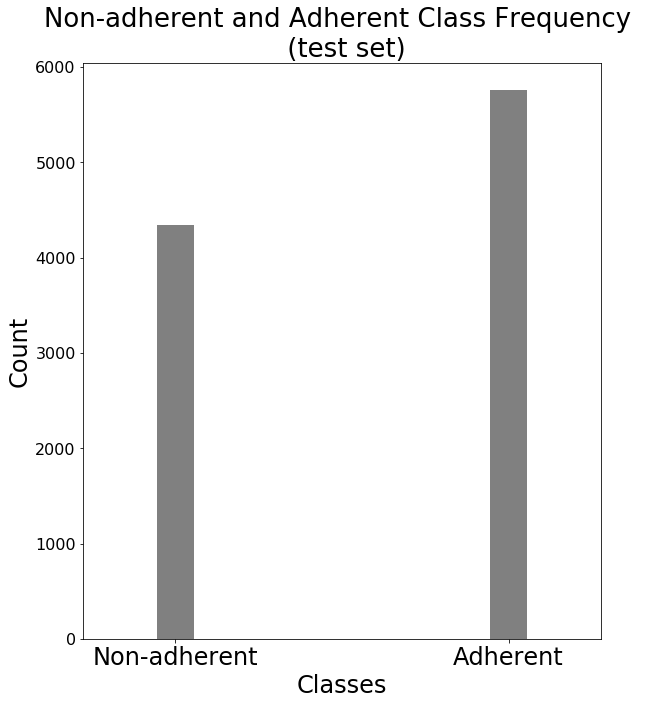

In [19]:
pyplot.rcParams.update({'font.size':16})
pyplot.figure(figsize=(9,10))

fs= 20
pyplot.subplot(111)
pyplot.hist(y_test[:], bins=10, color='gray')

pyplot.subplots_adjust(top=0.9, bottom=0.1, left=0.10, right=0.90, hspace=0.4, wspace=0.2)

pyplot.xlim(-0.2, 1.2)
pyplot.xticks([0.05, 0.95], ["Non-adherent", "Adherent"], fontsize=fs*1.2)
pyplot.title('Non-adherent and Adherent Class Frequency \n (test set)', fontsize=fs*1.3)
pyplot.xlabel('Classes', fontsize=fs*1.2)
pyplot.ylabel('Count', fontsize=fs*1.2)
#pyplot.legend(fontsize=fs*0.8, loc='lower right')
filename = "/home/whsu014/plots/PDC_class_frequency_test.png"
pyplot.savefig(filename)
pyplot.show()

In [10]:
num_of_inds = x_train.shape[0]
num_per_fold = num_of_inds//10
print("Number of inds:", num_of_inds)
print("Number per fold:", num_per_fold)

start_time = time.time()
for f in range(1):
    #start = f*num_per_fold
    end = (f+1)*num_per_fold
    train1_x = x_train[:end, ]
    train2_x = x_train[end:, ]
    train_x_lr = np.append(train2_x, train1_x, axis=0) #new obj
    train1_y = y_train[:end, ]
    train2_y = y_train[end:, ]
    train_y_lr = np.append(train2_y, train1_y, axis=0)
    print("train_x_lr:", train_x_lr.shape)
    print("train_y_lr:", train_y_lr.shape)
    
    # remove data used for 
    # validation set
    val_num = int(np.ceil(train_x_lr.shape[0]/10))
    print("val num:", val_num)
    train_x = train_x_lr[:-val_num, :]
    print("Train x shape:", train_x.shape)
    train_y = train_y_lr[:-val_num]
    print("Train y shape:", train_y.shape)
    
    val_x = train_x_lr[-val_num:, :]
    val_y = train_y_lr[-val_num:]
    print("Val x shape:", val_x.shape)
    print("Val y shape:", val_y.shape)
    ###########################
    # RidgeClassifier
    ###########################
    rcv = RidgeClassifierCV(alphas=[1e-6, 1e-5, 1e-4, 
                          1e-3, 1e-2, 1e-1,
                          1.0, 10.0, 100.0], 
                 normalize=True,
                 store_cv_values=True).fit(train_x, train_y)
    print("Prediction using RidgeCV")
    a = rcv.alpha_
    print("Alpha:", a)
    print("Mean accuracy:", rcv.score(val_x, val_y))
    ###########################
    # LogisticRegression
    ###########################
    '''
    rcv = LogisticRegression(solver='lbfgs',
                             penalty='none',
                             max_iter=10000,
                            ).fit(train_x, train_y)
    '''
    ########################
    # Predict on test set
    ########################
    print("Test x shape:", x_test.shape)
    print("Test y shape:", y_test.shape)
    print("Mean accuracy:", rcv.score(val_x, val_y))
    test_yhat = rcv.predict(x_test)
    lr_probs = rcv.decision_function(x_test)
    print('lr_probs shape:', lr_probs.shape)
    print(np.array([lr_probs[: ]]).T.shape)
print("Number of coefficients (weight vector):", len(rcv.coef_[0]))
print("Intercept", rcv.intercept_)
print("Entire process took: ", time.time() - start_time)

Number of inds: 90000
Number per fold: 9000
train_x_lr: (90000, 182)
train_y_lr: (90000,)
val num: 9000
Train x shape: (81000, 182)
Train y shape: (81000,)
Val x shape: (9000, 182)
Val y shape: (9000,)
Prediction using RidgeCV
Alpha: 0.01
Mean accuracy: 0.7134444444444444
Test x shape: (10096, 182)
Test y shape: (10096,)
Mean accuracy: 0.7134444444444444
lr_probs shape: (10096,)
(10096, 1)
Number of coefficients (weight vector): 182
Intercept [-0.13480914]
Entire process took:  1.3014988899230957


In [ ]:
val_yhat = rcv.predict(val_x)
print(val_yhat.shape)

acc = 0
for i in range(val_x.shape[0]):
    if val_yhat[i] == val_y[i]:
        acc += 1
print(acc)
print(acc/val_x.shape[0])

'''
print(test_yhat.shape)
print(y_test.shape)
print(test_yhat[:10])
print(y_test[:10])
acc = 0
for i in range(y_test.shape[0]):
    if test_yhat[i] == y_test[i]:
        acc += 1
print(acc)
print(acc/y_test.shape[0])
'''

In [38]:
lr_probs_df = pd.DataFrame(lr_probs)
lr_probs_df.columns = ['ADHERENT']
print(lr_probs_df.shape)
feather.write_dataframe(lr_probs_df, "/home/whsu014/data/PDC_Logit_yhat_10000iter.feather")

(10096, 1)


In [6]:
probs_df = feather.read_dataframe("/home/whsu014/data/PDC_Logit_normalized_no_penalty_yhat.feather")
print(probs_df.columns)
print(probs_df.shape)
probs_df.columns = ['ADHERENT']
feather.write_dataframe(probs_df, "/home/whsu014/data/PDC_Logit_normalized_no_penalty_yhat.feather")

Index(['LL_Not_COVERED'], dtype='object')
(10096, 1)


## Cox proportional hazard data preparation

In [55]:
def setup_xy_last_quarter_PDC(time_series_v):
    num_of_inds = time_series_v.shape[0]//28
    num_of_features = time_series_v.shape[1]
    
    x_ = np.empty((num_of_inds, num_of_features + 1)) # additional feature time
    y_ = []
    for i in range(num_of_inds):
        ind_v = copy.deepcopy(time_series_v[(i*28):((i+1)*28), :])
        x_[i, :-1] = ind_v[7, :]
        ##############################
        # construct y
        ##############################
        adherent = False
        event_time = [90 * 20]
        if sum(ind_v[8:, 28])/20 >= 80:
            y_.append(0)
            adherent = True
        else:
            y_.append(1)
        ###############################
        # find time to event
        ###############################
        PDC_gap = 0
        if (not adherent) and (len(event_time) == 1):
            for j in range(8, 28):
                ##############################
                #if ind_v[j, 28] < 80:
                ##############################
                PDC_gap += (100 - ind_v[j, 28])
                if PDC_gap > 400:
                    event_time.append((j-7)*90)
        x_[i, -1] = min(event_time) 
    return x_, np.array(y_)

In [57]:
def setup_xy_aggregated_PDC(time_series_v):
    num_of_inds = time_series_v.shape[0]//28
    num_of_features = time_series_v.shape[1]
    
    x_ = np.empty((num_of_inds, num_of_features + 1)) # additional feature time
    y_ = []
    for i in range(num_of_inds):
        ind_v = copy.deepcopy(time_series_v[(i*28):((i+1)*28), :])
        x_[i, 0:9] = ind_v[7, 0:9]
        x_[i, 9:169] = np.sum(ind_v[:8, 9:169], axis=0)/8.0
        x_[i, 169:182] = ind_v[7, 169:182]
        ##############################
        # construct y
        ##############################
        adherent = False
        event_time = [90 * 20]
        if sum(ind_v[8:, 28])/20 >= 80:
            y_.append(0)
            adherent = True
        else:
            y_.append(1)
        ##############################
        # find time to event
        ##############################
        PDC_gap = 0
        if (not adherent) and (len(event_time) == 1):
            for j in range(8, 28):
                ##########################
                #if ind_v[j, 28] < 80:
                ##########################
                PDC_gap += (100 - ind_v[j, 28])
                if PDC_gap > 400:
                    event_time.append((j-7)*90)
        x_[i, -1] = min(event_time)
    return x_, np.array(y_)

In [65]:
#x_train, y_train = setup_xy_aggregated_PDC(train_v)
#x_test, y_test = setup_xy_aggregated_PDC(test_v)

x_train, y_train = setup_xy_last_quarter_PDC(train_v)
x_test, y_test = setup_xy_last_quarter_PDC(test_v)

#x_train, y_train = setup_xy_cox(train_v)
#x_test, y_test = setup_xy_cox(test_v)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(90000, 183)
(90000,)
(10096, 183)
(10096,)


In [66]:
train_PDC_v = np.append(x_train, np.array([y_train]).T, axis = 1)
print(train_PDC_v.shape)
test_PDC_v = np.append(x_test, np.array([y_test]).T, axis = 1)
print(test_PDC_v.shape)

(90000, 184)
(10096, 184)


In [67]:
col_names = list(test_df.columns)
col_names = col_names[:-7]
print(len(col_names))
col_names.extend(["TIME", "STATUS"])
print(len(col_names))

182
184


In [68]:
train_PDC_df = pd.DataFrame(train_PDC_v)
test_PDC_df = pd.DataFrame(test_PDC_v)
train_PDC_df.columns = col_names
test_PDC_df.columns = col_names
feather.write_dataframe(train_PDC_df, "/home/whsu014/data/Cox_PDC_last_quarter_train_90000inds.feather")
feather.write_dataframe(test_PDC_df, "/home/whsu014/data/Cox_PDC_last_quarter_test_10096inds.feather")

In [69]:
# data check
print(train_PDC_df[train_PDC_df['STATUS']==1]['TIME'].unique())
print(train_PDC_df[train_PDC_df['STATUS']==0]['TIME'].unique())
print(test_PDC_df[test_PDC_df['STATUS']==1]['TIME'].unique())
print(test_PDC_df[test_PDC_df['STATUS']==0]['TIME'].unique())

[ 990.  450.  900. 1530.  810.  630.  540. 1080. 1350. 1710. 1620. 1260.
 1800. 1440. 1170.  720.]
[1800.]
[ 450. 1710. 1530.  900.  810. 1080.  630. 1800. 1350. 1170. 1620.  540.
  720. 1440. 1260.  990.]
[1800.]


In [62]:
print(train_PDC_df["TIME"].unique()) # 1620, 1710
print(train_PDC_df["STATUS"].unique())
print(test_PDC_df["TIME"].unique()) #  1710
print(test_PDC_df["STATUS"].unique())

[1800.  990.  450.  900. 1530.  810.  630.  540. 1080. 1350. 1710. 1620.
 1260. 1440. 1170.  720.]
[0. 1.]
[ 450. 1710. 1800. 1530.  900.  810. 1080.  630. 1350. 1170. 1620.  540.
  720. 1440. 1260.  990.]
[1. 0.]


(array([4339.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5757.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

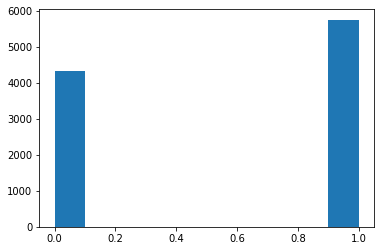

In [19]:
pyplot.hist(test_PDC_df.STATUS)

In [29]:
R_formula = ""
for i in list(train_PDC_df.columns):
    R_formula += i + " + "
print(R_formula)

VSIMPLE_INDEX_MASTER + AGE + SEX + NZDEP + ETHN_1 + ETHN_2 + ETHN_3 + ETHN_4 + ETHN_5 + TEST + HDL + LDL + TRI + TCL + TCHDL + TESTED + DIED + LL_SIMVASTATIN + LL_BEZAFIBRATE + LL_ATORVASTATIN + LL_EZETIMIBE + LL_NICOTINIC_ACID + LL_ACIPIMOX + LL_CHOLESTYRAMINE + LL_COLESTIPOL_HYDROCHLORIDE + LL_PRAVASTATIN + LL_EZETIMIBE_WITH_SIMVASTATIN + LL_GEMFIBROZIL + LL_PDC + CVD_FELODIPINE + CVD_QUINAPRIL + CVD_METOPROLOL_SUCCINATE + CVD_CILAZAPRIL + CVD_ATENOLOL + CVD_BENDROFLUMETHIAZIDE + CVD_WARFARIN_SODIUM + CVD_FUROSEMIDE + CVD_CELIPROLOL + CVD_DILTIAZEM_HYDROCHLORIDE + CVD_ASPIRIN + CVD_NIFEDIPINE + CVD_CAPTOPRIL + CVD_DIPYRIDAMOLE + CVD_CANDESARTAN_CILEXETIL + CVD_INDAPAMIDE + CVD_ENALAPRIL_MALEATE + CVD_SOTALOL + CVD_GLYCERYL_TRINITRATE + CVD_ISOSORBIDE_MONONITRATE + CVD_PINDOLOL + CVD_CARVEDILOL + CVD_METHYLDOPA + CVD_LOSARTAN_POTASSIUM + CVD_VERAPAMIL_HYDROCHLORIDE + CVD_AMILORIDE_HYDROCHLORIDE + CVD_CLONIDINE_HYDROCHLORIDE + CVD_CLONIDINE + CVD_NADOLOL + CVD_PROPRANOLOL + CVD_AMLODIP